In [2]:
# Imports
from plots import *
from PMs import *

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from scipy.stats import spearmanr

import math
import PMs

pd.set_option('display.max_columns', None)

In [3]:
canbay = pd.read_excel("canbaydata.xlsx")
#######################################################################################
canbay.head()

,Sample site,Identification,Lon,Lat,Cu,Pb,Zn,Ni,Cr,Cd,Co,PLI,Xlf,Xhf,Xfd,Form
0,1,MCI-1,29.771,40.759,45.1,42.0,78.0,51.0,19.4,0.32,18.0,1.70,176,169,4.0,Q
1,2,MCI-7,30.004,40.761,39.0,42.0,78.0,50.0,17.1,0.29,14.0,1.55,203,198,2.5,Q
2,3,MCI-8,30.028,40.762,41.0,45.0,68.0,48.0,29.3,0.12,15.0,1.48,119,115,3.4,Q
3,4,MCI-9,29.983,40.727,38.0,38.2,102.0,43.0,33.9,0.08,21.0,1.51,78,73,6.4,Q
4,5,MCI-15,29.785,40.751,40.8,44.0,72.0,57.0,22.8,0.28,15.0,1.66,164,154,6.1,Q


In [4]:
xx = pd.DataFrame(canbay, columns=['Sample site', 'Lon', "Lat", "Cu", "Pb", "Zn", "Ni", "Cr", "Cd", "Co", "PLI", "Xlf", "Xhf", "Xfd"])
x  = xx.iloc[0:28, :]                                # Filtering samples only for first site
x = x.astype(float)                                  # Transforming data type 
x.describe()

,Sample site,Lon,Lat,Cu,Pb,Zn,Ni,Cr,Cd,Co,PLI,Xlf,Xhf,Xfd
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,14.500000,29.919929,40.752679,35.325000,31.575000,74.660714,39.717857,35.328571,0.216786,16.900000,1.482500,86.071429,81.535714,6.278571
std,8.225975,0.085930,0.030140,7.697937,11.237293,12.103759,10.389562,12.162293,0.088905,3.701451,0.195933,57.772176,55.878494,2.618079
min,1.000000,29.761000,40.709000,17.900000,8.000000,60.000000,21.000000,17.100000,0.070000,10.100000,1.000000,10.000000,9.000000,2.500000
25%,7.750000,29.856750,40.723000,31.650000,24.000000,64.775000,33.250000,28.725000,0.115000,14.000000,1.347500,45.000000,42.000000,4.300000
50%,14.500000,29.946000,40.758000,37.300000,34.500000,72.000000,38.550000,34.050000,0.235000,17.000000,1.510000,67.500000,64.000000,6.250000
75%,21.250000,29.987500,40.767500,40.850000,41.325000,78.050000,47.250000,38.700000,0.282500,18.500000,1.632500,123.000000,118.500000,7.625000
max,28.000000,30.061000,40.811000,47.200000,45.000000,102.200000,59.000000,70.800000,0.350000,25.000000,1.790000,203.000000,198.000000,11.400000


(array([4., 5., 9., 2., 1., 1., 3., 3.]),
 array([ 10.   ,  34.125,  58.25 ,  82.375, 106.5  , 130.625, 154.75 ,
        178.875, 203.   ]),
 <BarContainer object of 8 artists>)

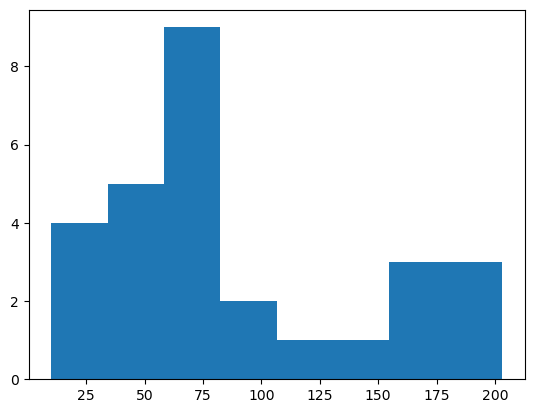

In [5]:
plt.hist(x.Xlf, bins = 8)

In [9]:
filtered_features = ['Lon', "Lat", "Cu", "Pb", "Zn", "Ni", "Cr", "Cd", "Co", "PLI", "Xlf", "Xhf", "Xfd"]


# Calculate the Spearman rank correlation coefficients and p-values
corr, p_value = spearmanr(xx, nan_policy='omit')

# Convert to DataFrame for easier plotting
corr_df = pd.DataFrame(corr, index=filtered_features, columns=filtered_features)
p_value_df = pd.DataFrame(p_value, index=filtered_features, columns=filtered_features)

# Create a mask for significant p-values (e.g., p < 0.01)
p_value_mask = 0.005
significant_mask = p_value_df < p_value_mask

# Mask for the upper triangle
mask = np.triu(np.ones_like(corr_df, dtype=bool))

# Combine the masks
final_mask = mask | ~significant_mask

# Set up the matplotlib figure
plt.figure(figsize=(20, 16))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_df, mask=final_mask, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5, vmin=-1, vmax=1, annot_kws={"size": 8})

# Adjust layout for better readability
plt.xticks(rotation=90, ha='right', fontsize=10, fontweight='bold')
plt.yticks(rotation=0, fontsize=10, fontweight='bold')
plt.title('Spearman Rank Correlation Heatmap showing significant P-Values < '+str(p_value_mask), fontsize=12, fontweight='bold')

# Show the plot
folder_path = 'figures_output/'
filename = f"Corr_Hysteresis.png"
plt.savefig(folder_path + filename)
plt.show()

TypeError: '<' not supported between instances of 'str' and 'float'

In [ ]:
variables = pd.DataFrame(x, columns=["Xlf", "Cr", "Cu", "Pb", "Ni"])
variables["Cr2"] = x.Cr**2
variables["Cu2"] = x.Cu**2
variables["Pb2"] = x.Pb**2
variables["Ni2"] = x.Ni**2

print(type(variables))

regression = linear_model.LinearRegression()
model = regression.fit(variables, variables.Xlf)
score = model.score(variables, variables.Xlf)
canbaycoef = model.coef_
canbaybias = model.intercept_

if score:
    print('The score of the regression fit is {0:.2f} (R**2).'.format(score))
    print("coeficients =", model.coef_)
    print("The bias is =",model.intercept_)

<class 'pandas.core.frame.DataFrame'>
The score of the regression fit is 1.00 (R**2).
coeficients = [ 1.00000000e+00 -1.84167043e-15 -8.21629002e-15 -1.28870091e-15
  5.36741053e-15  3.17048471e-17  2.05528627e-16  1.60851019e-16
 -2.17546710e-16]
The bias is = 0.0


In [ ]:
"""
Variables for Ayoubi 2018a in contaminated soils
"Multiple linear modeling between soil properties, magnetic susceptibility and heavy metals in various land uses"

"""
delthax = 25
sand =             35
silt =             44
clay =             20
orm =               1
Cr =               30                          # Cr (cromiun)   concentration in (mg/kg)
Co =               17                          # Co (cobalt)    concentration in (mg/kg)
Cu =               27                          # Cu (copper)    concentration in (mg/kg)
Fe =            16000                          # Fe (iron)      concentration in (mg/kg)
K  =                1                          # K  (Potasium)  concentration in % 
Pb =               30                          # Pb (lead)      concentration in (mg/kg)
Mn =              350                          # Mn (manganese) concentration in (mg/kg)
Ni =               50                          # Ni (nickel)    concentration in (mg/kg)
Th =               6.8                         # Th (torium)    concentration in ppm
Zn =               50                          # Zn (zinc)      concentration in (mg/kg)
pH =               7.8                         # pH  
Xl =              426e-8                            # Magnetic suceptibility at low frecuency in soil
Xh =              416e-8                            # Magnetic suceptibility at high frecuency in soil
Xf =     (Xl - Xh)*100/Xl                           # Magnetic dependet susceptibility [%] in soil
PLI =               2                               # Pollution Load Index
cec =               25                              # Cation exchange capacity cmolc kg–1


sand_ = np.arange(9   , 72    , (72-9)/delthax       )
silt_ = np.arange(5   , 80    , (80-5)/delthax       )
clay_ = np.arange(5   , 80    , (80-5)/delthax       )
orm_  = np.arange(0.2 , 3.3   , (3.3-0.2)/delthax    )
Cr_ =   np.arange(20  , 70    , (70-20)/delthax      )
Co_ =   np.arange(11  , 25    , (25-11)/delthax      )
Cu_ =   np.arange(15  , 50   , (50-15)/delthax     )
Fe_ =   np.arange(4500, 100000, (100000-4500)/delthax)
Pb_ =   np.arange(8   , 45    , (45-8)/delthax       )
Mn_ =   np.arange(240 , 1500  , (1500-240)/delthax   )
Ni_ =   np.arange(20  , 60   , (60-20)/delthax     )
Zn_ =   np.arange(14  , 280   , (280-14)/delthax     )
pH_ =   np.arange(7   , 10    , (10-7)/delthax       )
PLI_ayoubi =  np.arange(1.5   , 5     , (5-1.5)/delthax)
PLI_canbay =  np.arange(1.3   , 2     , (2-1.3)/delthax)
cec_ =  np.arange(5   , 40    , (40-5)/delthax)

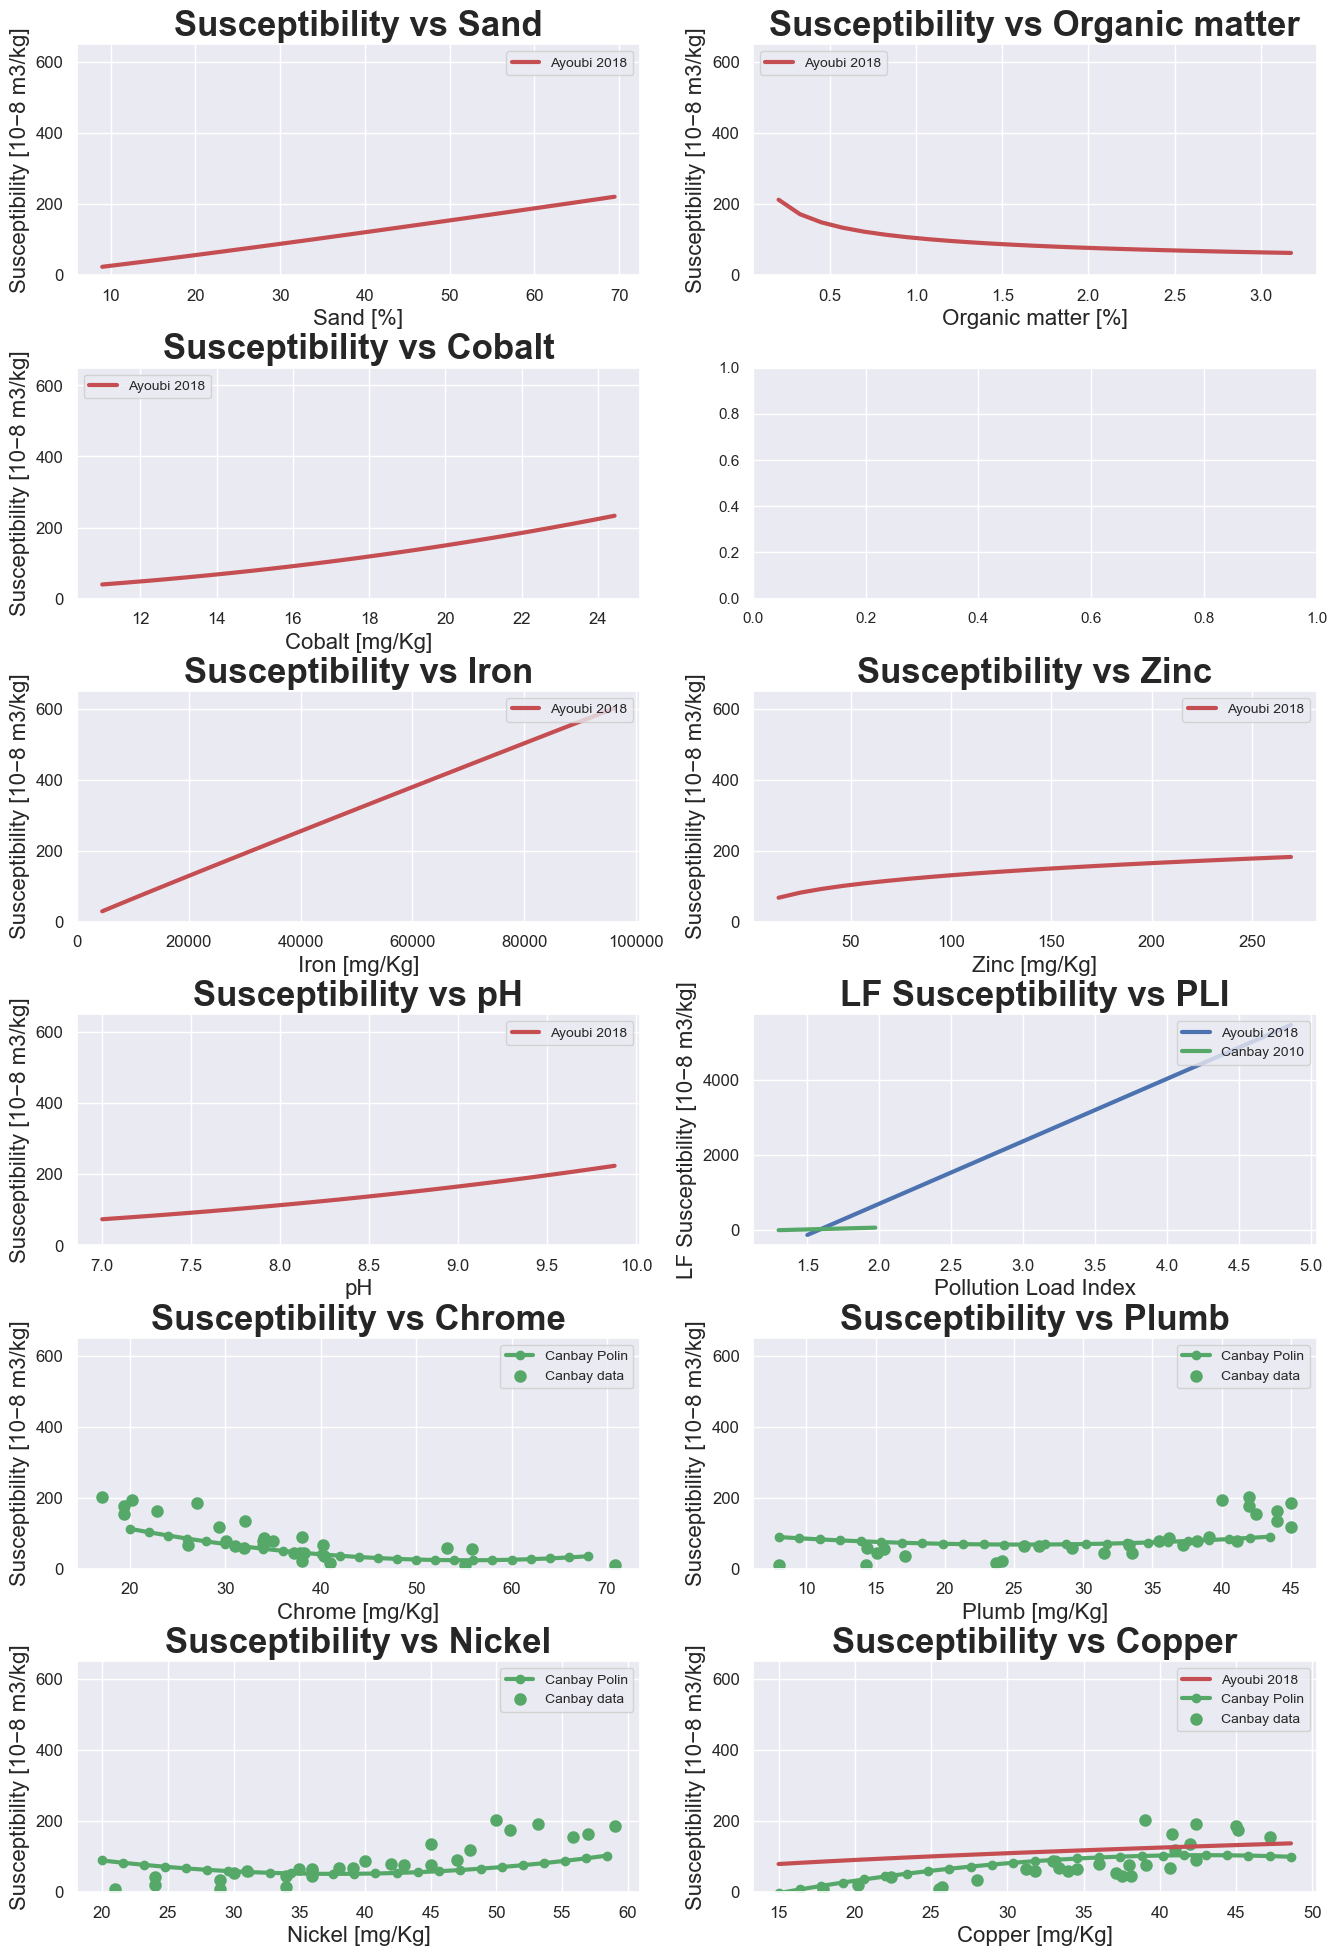

In [ ]:
"""
Pedotransfer empirical functions from Ayoubi et al 2018: 
"Multiple linear modeling between soil properties, magnetic susceptibility and heavy metals in various land uses"

"""
fig1, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10), (ax11, ax12)) = plt.subplots(6, 2, figsize=(16, 24))
fig1.subplots_adjust(hspace=0.4)
lw = 3
yc = 650

xlayoubi18_sand =  mag.Xlayoubi18(sand_, orm, Co, Cu, Fe, Zn, pH, np)
ax1.plot(sand_, xlayoubi18_sand,          "r-", linewidth=lw, label= 'Ayoubi 2018')
#><><>><><><><><><>><><><<><><><><><><><><><><><><><><><><><><>><><><><><><><><><><><><><><><><><><><><><><><><><><><

xlayoubi18_orm =  mag.Xlayoubi18(sand,  orm_, Co, Cu, Fe, Zn, pH, np)
ax2.plot(orm_, xlayoubi18_orm,            "r-", linewidth=lw, label='Ayoubi 2018')
#><><>><><><><><><>><><><<><><><><><><><><><><><><><><><><><><>><><><><><><><><><><><><><><><><><><><><><><><><><><><

xlayoubi18_Co =  mag.Xlayoubi18(sand,  orm, Co_, Cu, Fe, Zn, pH, np)
ax3.plot(Co_, xlayoubi18_Co,              "r-", linewidth=lw, label='Ayoubi 2018')
#><><>><><><><><><>><><><<><><><><><><><><><><><><><><><><><><>><><><><><><><><><><><><><><><><><><><><><><><><><><><

canbaypoli_Cu =  mag.canbaypoli(x, Cr, Cu_, Pb, Ni, pd)
xlayoubi18_Cu =  mag.Xlayoubi18(sand,  orm, Co, Cu_, Fe, Zn, pH, np)
ax12.plot(Cu_ , xlayoubi18_Cu,              "r-", linewidth=lw, label = "Ayoubi 2018")
ax12.plot(Cu_ , canbaypoli_Cu,             "go-", linewidth=lw, label = "Canbay Polin")
ax12.scatter(x.Cu, x.Xlf        ,         c= "g", linewidth=lw, label = "Canbay data")
#><><>><><><><><><>><><><<><><><><><><><><><><><><><><><><><><>><><><><><><><><><><><><><><><><><><><><><><><><><><><

xlayoubi18_Fe =  mag.Xlayoubi18(sand,  orm, Co, Cu, Fe_, Zn, pH, np)
ax5.plot(Fe_, xlayoubi18_Fe,              "r-", linewidth=lw, label= "Ayoubi 2018")
#><><>><><><><><><>><><><<><><><><><><><><><><><><><><><><><><>><><><><><><><><><><><><><><><><><><><><><><><><><><><

xlayoubi18_Zn =  mag.Xlayoubi18(sand,  orm, Co, Cu, Fe, Zn_, pH, np)
ax6.plot(Zn_, xlayoubi18_Zn,              "r-", linewidth=lw, label= "Ayoubi 2018")
#><><>><><><><><><>><><><<><><><><><><><><><><><><><><><><><><>><><><><><><><><><><><><><><><><><><><><><><><><><><><

xlayoubi18_pH =  mag.Xlayoubi18(sand,  orm, Co, Cu, Fe, Zn, pH_, np)
ax7.plot(pH_, xlayoubi18_pH,              "r-", linewidth=lw, label = "Ayoubi 2018")
#><><>><><><><><><>><><><<><><><><><><><><><><><><><><><><><><>><><><><><><><><><><><><><><><><><><><><><><><><><><><

xlayoubi18_PLI =  mag.Xlayoubi18pli(PLI_ayoubi)
canbay_PLI     =  mag.canbaypli(PLI_canbay)
ax8.plot(PLI_ayoubi, xlayoubi18_PLI,            "b-", linewidth=lw, label = "Ayoubi 2018")
ax8.plot(PLI_canbay, canbay_PLI,                "g-", linewidth=lw, label = "Canbay 2010")
#><><>><><><><><><>><><><<><><><><><><><><><><><><><><><><><><>><><><><><><><><><><><><><><><><><><><><><><><><><><><

canbaypoli_Cr =  mag.canbaypoli(x, Cr_, Cu, Pb, Ni, pd)
ax9.plot(Cr_, canbaypoli_Cr,              "go-", linewidth=lw, label = "Canbay Polin")
ax9.scatter(x.Cr, x.Xlf        ,         c= "g", linewidth=lw, label = "Canbay data")
#><><>><><><><><><>><><><<><><><><><><><><><><><><><><><><><><>><><><><><><><><><><><><><><><><><><><><><><><><><><><

canbaypoli_Pb =  mag.canbaypoli(x, Cr, Cu, Pb_, Ni, pd)
ax10.plot(Pb_, canbaypoli_Pb,              "go-", linewidth=lw, label = "Canbay Polin")
ax10.scatter(x.Pb, x.Xlf        ,         c= "g", linewidth=lw, label = "Canbay data")
#><><>><><><><><><>><><><<><><><><><><><><><><><><><><><><><><>><><><><><><><><><><><><><><><><><><><><><><><><><><><

canbaypoli_Ni =  mag.canbaypoli(x, Cr, Cu, Pb, Ni_, pd)
ax11.plot(Ni_, canbaypoli_Ni,              "go-", linewidth=lw, label = "Canbay Polin")
ax11.scatter(x.Ni, x.Xlf        ,         c= "g", linewidth=lw, label = "Canbay data")

mag.pltmsc(ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, lw, yc, plt)

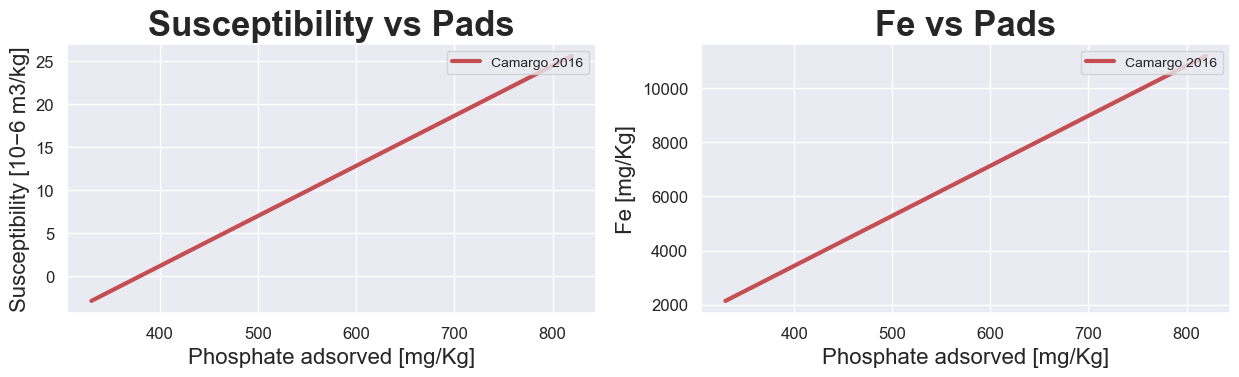

In [ ]:
"""
Camargo et al 2016.  
A total of 308 soil samples were collected from Hapludox and Eutrudox soils formed from sandstone in Brazil.
"Phosphate adsorption is related to the physical and chemical properties of soil, including the content of iron (Fe) 
and aluminium (Al) oxides (Singh & Gilkes, 1991; Daly et al., 2001). This relationship comes from the effects of the 
interaction between P and the functional groups of the oxides (Stumm, 1992; Persson et al., 1996). Iron oxides are 
major pedogenic indicators by virtue of being formed under environmental influences, such as a large iron content in 
solution, pH, temperature or relief (Schwertmann & Taylor, 1989)."
Fe is iron extracted by dithionite–citrate–bicarbonate (Fed)
"""
fig2, ((axp1, axp2)) = plt.subplots(1, 2, figsize=(15, 3.5))
fig2.subplots_adjust(hspace=0.4)
lw = 3
yc = 25
Pads_ = np.arange(330, 840, (840-330)/delthax)
    
phosphate_ =  mag.phosphate_x(Pads_)
axp1.plot(Pads_, phosphate_,          "r-", linewidth=lw, label= 'Camargo 2016')

phosphate  =  mag.phosphate_fe(Pads_)
axp2.plot(Pads_, phosphate,           "r-", linewidth=lw, label= 'Camargo 2016')

mag.camargoplots(axp1, axp2)

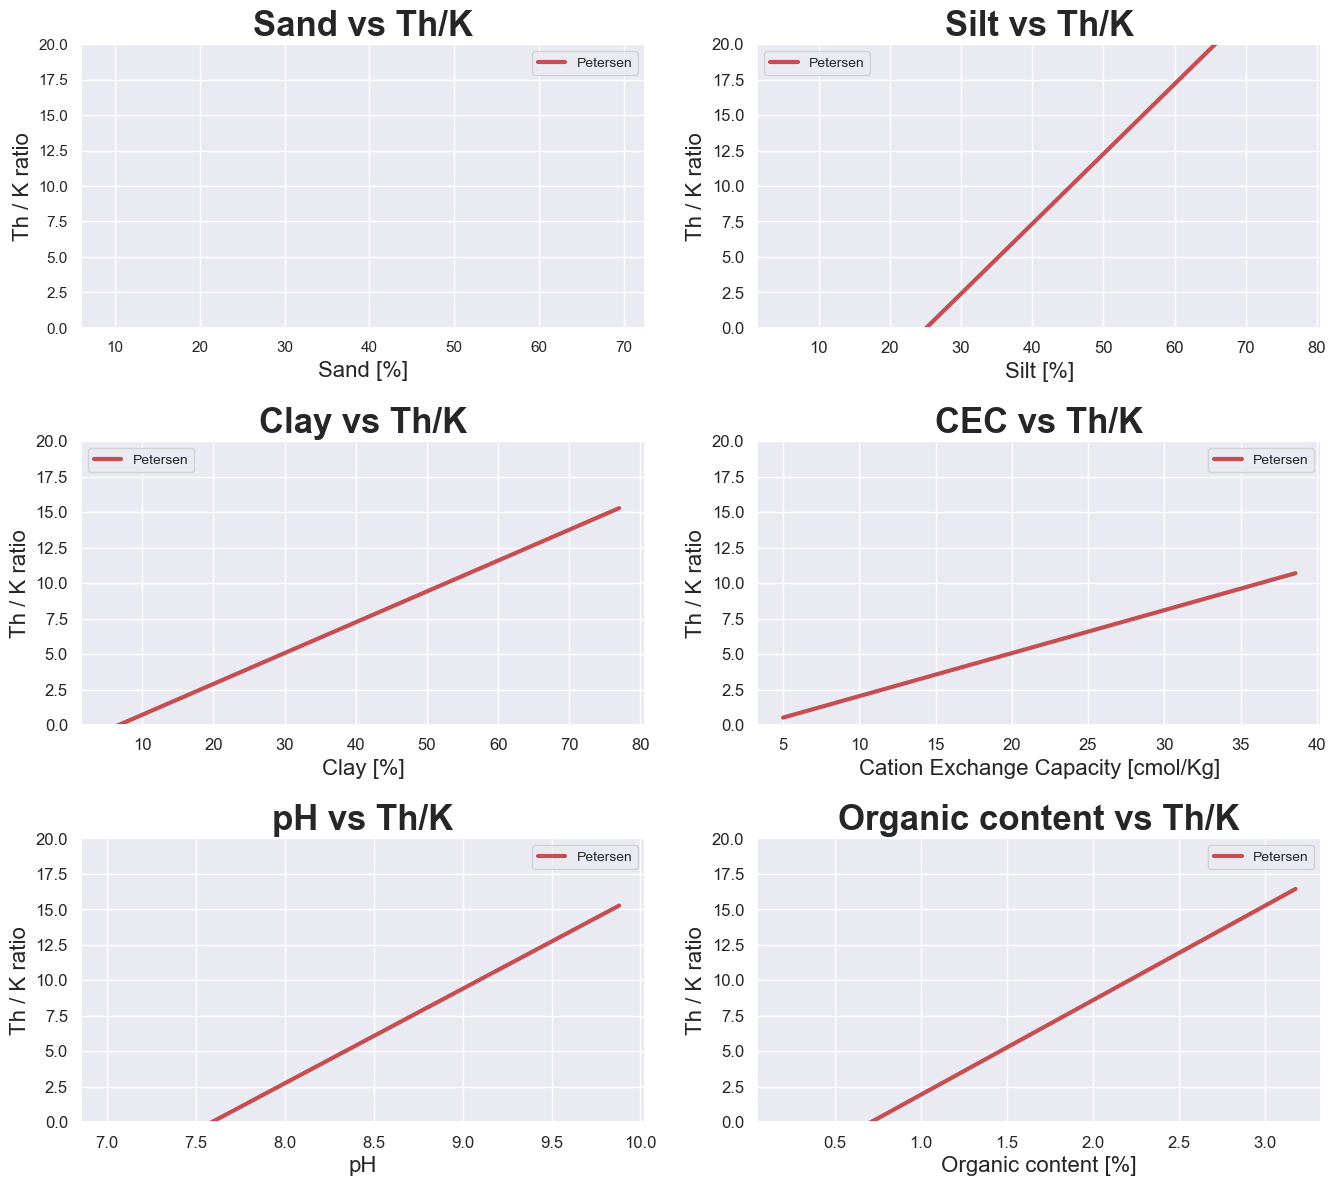

In [ ]:
"""
Petersen et al. 2012. Spectometry in european soils. ThK is the ratio Th / K torium divided by potasium.

"""
fig3, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(16, 14))
fig3.subplots_adjust(hspace=0.4)
lw = 3
yc = 20
ThK = Th/K
ThK_ = np.arange(20, 0, 20/delthax)

petersensand =  mag.petersensand(sand_)
ax1.plot(sand_, petersensand,          "r-", linewidth=lw, label= 'Petersen')
#><><>><><><><><><>><><><<><><><><><><><><><><><><><><><><><><>><><><><><><><><><><><><><><><><><><><><><><><><><><>

petersensilt =  mag.petersensilt(silt_)
ax2.plot(silt_, petersensilt,          "r-", linewidth=lw, label= 'Petersen')
#><><>><><><><><><>><><><<><><><><><><><><><><><><><><><><><><>><><><><><><><><><><><><><><><><><><><><><><><><><><><

petersenclay =  mag.petersenclay(clay_)
ax3.plot(clay_, petersenclay,          "r-", linewidth=lw, label= 'Petersen')
#><><>><><><><><><>><><><<><><><><><><><><><><><><><><><><><><>><><><><><><><><><><><><><><><><><><><><><><><><><><><

petersencec =  mag.petersencec(cec_)
ax4.plot(cec_, petersencec,            "r-", linewidth=lw, label= 'Petersen')
#><><>><><><><><><>><><><<><><><><><><><><><><><><><><><><><><>><><><><><><><><><><><><><><><><><><><><><><><><><><><

petersenph =  mag.petersenph(pH_)
ax5.plot(pH_, petersenph,          "r-", linewidth=lw, label= 'Petersen')
#><><>><><><><><><>><><><<><><><><><><><><><><><><><><><><><><>><><><><><><><><><><><><><><><><><><><><><><><><><><><

petersenoc =  mag.petersenoc(orm_)
ax6.plot(orm_, petersenoc,          "r-", linewidth=lw, label= 'Petersen')
#><><>><><><><><><>><><><<><><><><><><><><><><><><><><><><><><>><><><><><><><><><><><><><><><><><><><><><><><><><><><

mag.pltgamma(ax1, ax2, ax3, ax4, ax5, ax6, lw, yc, plt)

In [ ]:
"""
Variables for Ayoubi 2019 in volcanic and semiarid soils

"""
Fe =            15000                          # Fe (iron)      concentration in (mg/kg)
Mn =              950                          # Mn (manganese) concentration in (mg/kg)
Zn =               90                          # Zn (zinc)      concentration in (mg/kg)
Cu =               30                          # Cu (copper)    concentration in (mg/kg)
Ni =               85                          # Ni (nickel)    concentration in (mg/kg)
Co =               32                          # Co (cobalt)    concentration in (mg/kg)
Cr =               80                          # Cr (cromiun)   concentration in (mg/kg)
Xls =              0.2e-5                            # Magnetic suceptibility at low frecuency in soil
Xhs =              0.195e-5                          # Magnetic suceptibility at high frecuency in soil
Xfs =  (Xls - Xhs)*100/Xls                          # Magnetic dependet susceptibility [%] in soil
Xlr =              0.35e-5                          # Magnetic suceptibility at low frecuency in rock
Xhr =              0.345e-5                         # Magnetic suceptibility at high frecuency in rock
Xfr =  (Xlr - Xhr)*100/Xlr                          # Magnetic dependet susceptibility [%] in rock

Fe_ = np.arange(5000, 25000, (25000-5000)/delthax)
Mn_ = np.arange(450 , 1100 , (1100-450)/delthax)
Zn_ = np.arange(60  , 120  , (120-60)/delthax)
Cu_ = np.arange(20  , 40   , (40-20)/delthax)
Ni_ = np.arange(70  , 100  , (100-70)/delthax)
Co_ = np.arange(25  , 40   , (40-25)/delthax)
Cr_ = np.arange(65  , 100  , (100-65)/delthax)
Cr_ = np.arange(65,   100   ,  (100-65)/100)

In [ ]:
data = pd.read_excel("fieldsILVO.xlsx")
#######################################################################################
data.describe()

FileNotFoundError: [Errno 2] No such file or directory: 'fieldsILVO.xlsx'

In [ ]:
####  !!! !! !!!! introducing a average profile for each field and ploting a histogram of each one of the three1!

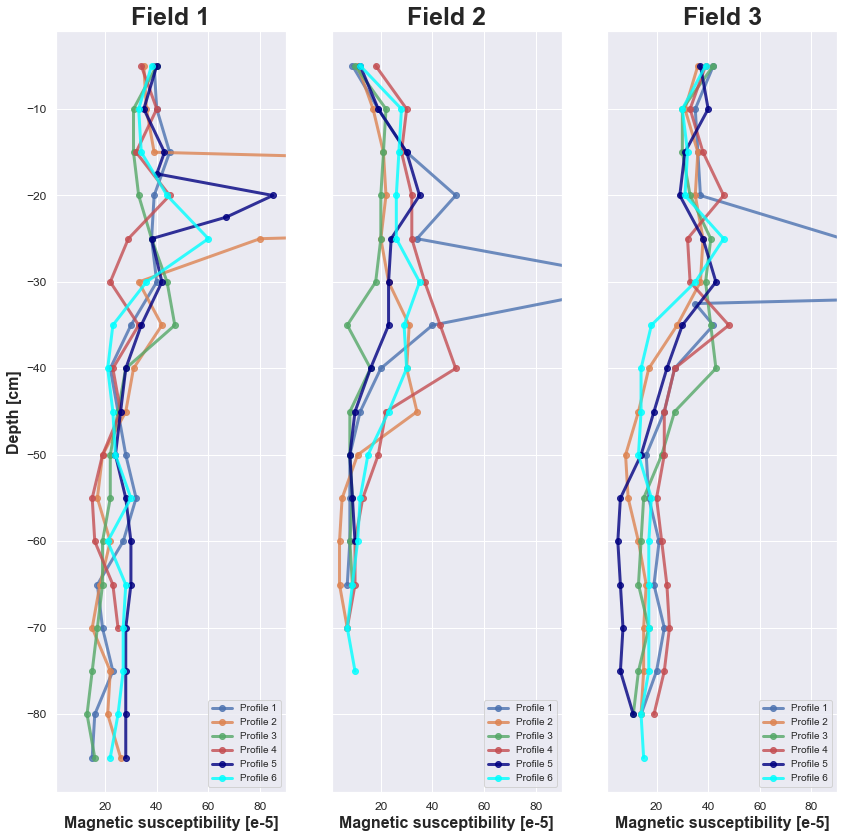

In [ ]:
#%matplotlib notebook
fig, ((axc1, axc2, axc3)) = plt.subplots(1, 3, sharex=True, sharey = True, figsize=(14, 14))
fig.subplots_adjust(hspace=0.4)
alfa = 0.8
lw = 3

axc1.plot(data.profile1field1, -data.depth, "o-", linewidth=lw, alpha = alfa, label='Profile 1')
axc1.plot(data.profile2field1, -data.depth, "o-", linewidth=lw, alpha = alfa, label='Profile 2')
axc1.plot(data.profile3field1, -data.depth, "o-", linewidth=lw, alpha = alfa, label='Profile 3')
axc1.plot(data.profile4field1, -data.depth, "o-", linewidth=lw, alpha = alfa, label='Profile 4')
axc1.plot(data.profile5field1, -data.depthsprofile5field1, "o-", linewidth=lw, color = "navy", alpha = alfa, label='Profile 5')
axc1.plot(data.profile6field1, -data.depth, "o-", color='cyan', linewidth=lw, alpha = alfa, label='Profile 6')

axc2.plot(data.profile1field2, -data.depth, "o-", linewidth=lw, alpha = alfa, label='Profile 1')
axc2.plot(data.profile2field2, -data.depth, "o-", linewidth=lw, alpha = alfa, label='Profile 2')
axc2.plot(data.profile3field2, -data.depth, "o-", linewidth=lw, alpha = alfa, label='Profile 3')
axc2.plot(data.profile4field2, -data.depth, "o-", linewidth=lw, alpha = alfa, label='Profile 4')
axc2.plot(data.profile5field2, -data.depth, "o-", linewidth=lw, color = "navy", alpha = alfa, label='Profile 5')
axc2.plot(data.profile6field2, -data.depth, "o-", color='cyan', linewidth=lw, alpha = alfa, label='Profile 6')

axc3.plot(data.profile1field3, -data.depthsprofile1field3, "o-", linewidth=lw, alpha = alfa, label='Profile 1')
axc3.plot(data.profile2field3, -data.depth, "o-", linewidth=lw, alpha = alfa, label='Profile 2')
axc3.plot(data.profile3field3, -data.depth, "o-", linewidth=lw, alpha = alfa, label='Profile 3')
axc3.plot(data.profile4field3, -data.depth, "o-", linewidth=lw, alpha = alfa, label='Profile 4')
axc3.plot(data.profile5field3, -data.depth, "o-", linewidth=lw, color = "navy", alpha = alfa, label='Profile 5')
axc3.plot(data.profile6field3, -data.depth, "o-", color='cyan', linewidth=lw, alpha = alfa, label='Profile 6')

mag.sets(axc1, axc2, axc3)